In [56]:
%load_ext autoreload
%autoreload 2
import edhec_risk_kit as erk
import pandas as pd
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"],12)
cov= ind["1996":"2000"].cov()
l=['Games','Fin']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:

w15 = erk.minimize_vol (0.15 ,er[l], cov.loc[l,l])
vol15 = erk.portfolio_vol(w15,cov.loc[l,l])
vol15

0.05616366940670657

In [47]:

def optimal_weight (n_points,er,cov):
    '''list of weights to run the optimizer to minimize the colatility'''
    target_rs = np.linspace(er.min(),er.max,n_points)
    weights= [ erk.minimize_vol(target_return,er,cov) for target_return in target_rs]
    return weights
def plot_ef(n_points,er,cov):
    '''plot the 2 asset efficient frontier'''
    weights = optimal_weight(n_points,er,cov)
    rets = [erk.portfolio_return(w , er) for w in weights]
    vols = [erk.portfolio_vol(w , cov) for w in weights]
    ef = pd.DataFrame({"Returns": rets ,"Volatility":vols})
    return ef.plot.line(x="Volatility",y="Returns",style='.-')

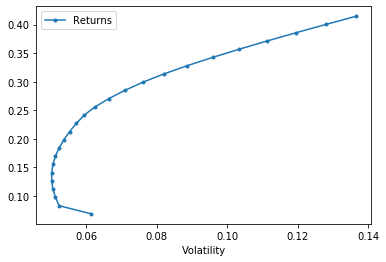

In [66]:
q=['Smoke','Fin','Games','Coal']
covl=cov.loc[q,q]
erk.plot_ef (25 , er[q],covl )
